<a href="https://colab.research.google.com/github/Bhumika-Chauhan09/cleanin_data/blob/main/Manual_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Heart Rate Alert: 79 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:09.673Z.
Heart Rate Alert: 85 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:32.053Z.
Heart Rate Alert: 104 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:33.053Z.
Heart Rate Alert: 112 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:34.053Z.
Heart Rate Alert: 116 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:35.053Z.
Heart Rate Alert: 118 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:36.053Z.
Heart Rate Alert: 119 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:37.053Z.
Heart Rate Alert: 120 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:38.053Z.
Heart Rate Alert: 121 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:39.053Z.
Heart Rate Alert: 125 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:40.053Z.
Heart Rate Alert: 125 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:42.054Z.
Heart Rate Alert: 125 BPM exceeds the limit of 75 BPM at 2023-09-11T15:50:43.054Z.
Heart 

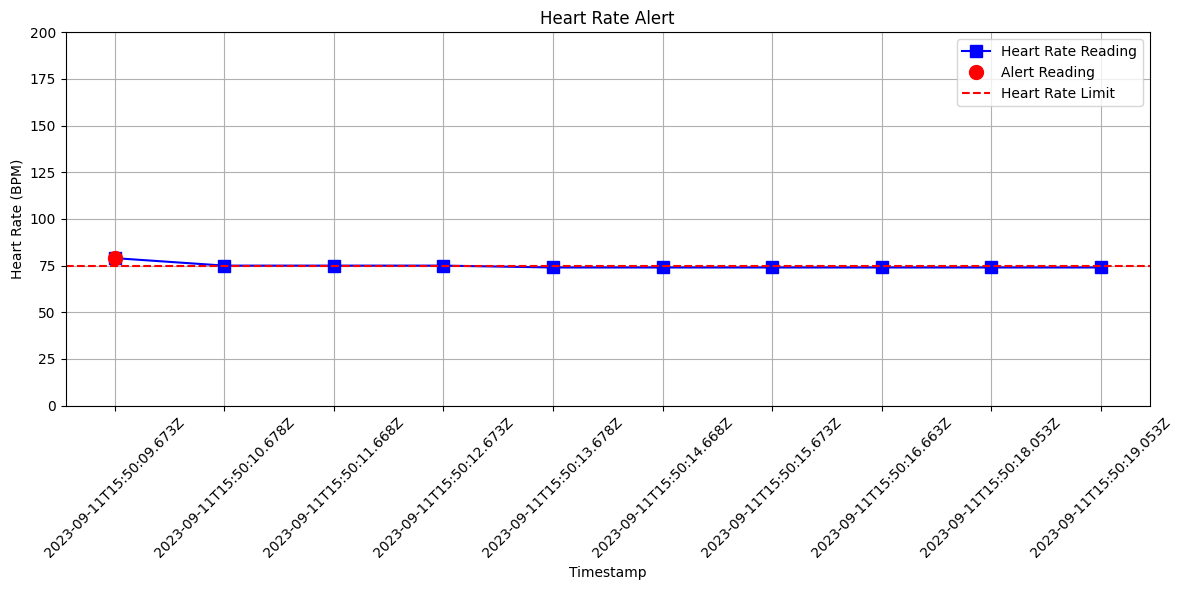

In [ ]:
# Install necessary libraries if they are not already installed
!pip install tk

import tkinter as tk
import csv
import time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Enable Matplotlib inline mode
%matplotlib inline

# Function to check heart rate sensor data and generate alerts
def check_heart_rate_data(display_limit=10):

    csv_file = 'heart_rate_data.csv'

    try:
        timestamps = []
        heart_rates = []

        with open(csv_file, 'r') as file:
            reader = csv.reader(file)
            # Assuming the first row contains headers, skip it
            next(reader)

            # Read all heart rate readings and timestamps
            for row in reader:
                timestamp, heart_rate = row
                timestamps.append(timestamp)
                heart_rate = int(heart_rate)
                heart_rates.append(heart_rate)

        # Define the heart rate limit for the alert
        heart_rate_limit = 75 # Adjust to your desired limit

        # Create a list to store alert readings
        alert_readings = []

        # Check if each heart rate reading exceeds the limit
        for timestamp, heart_rate in zip(timestamps, heart_rates):
            if heart_rate > heart_rate_limit:
                alert_readings.append((timestamp, heart_rate))

        if alert_readings:
            # Log the alert to the Colab output
            clear_output(wait=True)
            for timestamp, heart_rate in alert_readings:
                alert_message = f"Heart Rate Alert: {heart_rate} BPM exceeds the limit of {heart_rate_limit} BPM at {timestamp}."
                print(alert_message)

            # Create a plot to visualize a limited number of heart rate readings
            plt.figure(figsize=(12, 6))

            # Plot a subset of heart rate data with square markers and larger size
            num_data_points = min(display_limit, len(timestamps))
            plt.plot(timestamps[:num_data_points], heart_rates[:num_data_points], 'bs-', label='Heart Rate Reading', markersize=8)

            # Highlight alert readings in red
            for timestamp, heart_rate in alert_readings:
                if timestamp in timestamps[:num_data_points]:
                    idx = timestamps.index(timestamp)
                    plt.plot(timestamp, heart_rate, 'ro', label='Alert Reading', markersize=10)

            plt.axhline(heart_rate_limit, color='r', linestyle='--', label='Heart Rate Limit')
            plt.xlabel('Timestamp')
            plt.ylabel('Heart Rate (BPM)')
            plt.legend()
            plt.title('Heart Rate Alert')
            plt.xticks(rotation=45)
            plt.grid(True)

            # Set a fixed range for the Y-axis
            plt.ylim(0, 200)  # Adjust the range as needed

            plt.tight_layout()
            plt.show()
    except FileNotFoundError:
        print(f"CSV file '{csv_file}' not found.")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")

# Run the periodic heart rate sensor data check
while True:
    check_heart_rate_data(display_limit=10)  # Display 10 data points at a time
    # Adjust the sleep duration (in seconds) based on your project requirements
    time.sleep(10)  # Check every minute
